In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 6.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
from pandas_datareader import data as web
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Imports for Efficient Frontier plotting
from tqdm import tqdm
import plotly
import plotly.graph_objects as go

In [4]:
#Get the stock symbols/tickers in the portfolio
asset_s = ['GOOG', 'AMZN', 'KO', 'PG', 'JPM', 'BRK-B', 'SPY', 'GLD']

In [5]:
#Assign Weights to the stocks. 
weight_s = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, ])

In [6]:
#Get the stock/portfolio starting date
stockStartDate = '2017-01-01'

In [7]:
#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2023-01-16'

In [8]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in asset_s:
  df[stock] = yf.download(stock, start= stockStartDate, end= today)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
df

,GOOG,AMZN,KO,PG,JPM,BRK-B,SPY,GLD
Date,,,,,,,,
2017-01-03 00:00:00-05:00,39.306999,37.683498,34.493877,71.254486,73.235695,163.830002,202.856552,110.470001
2017-01-04 00:00:00-05:00,39.345001,37.859001,34.370102,71.508354,73.370766,164.080002,204.063370,110.860001
2017-01-05 00:00:00-05:00,39.701000,39.022499,34.452618,71.982262,72.695404,163.300003,203.901245,112.580002
2017-01-06 00:00:00-05:00,40.307499,39.799500,34.444370,71.956871,72.703850,163.410004,204.630737,111.750000
2017-01-09 00:00:00-05:00,40.332500,39.846001,34.097778,71.423729,72.754478,162.020004,203.955292,112.669998
...,...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,88.800003,87.360001,62.610001,152.039993,137.369995,315.529999,387.859985,174.100006
2023-01-10 00:00:00-05:00,89.239998,89.870003,62.130001,151.889999,138.600006,316.350006,390.579987,174.740005
2023-01-11 00:00:00-05:00,92.260002,95.089996,62.009998,150.660004,139.630005,320.369995,395.519989,174.619995


<ipython-input-10-3bfafa55dbe0>:14: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(my_stocks.columns.values, loc= 'upper')


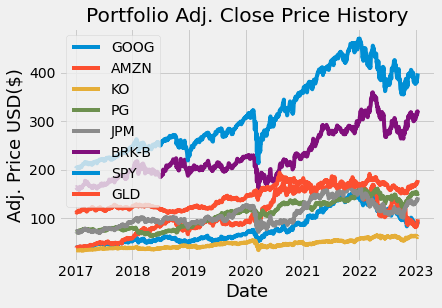

In [10]:
#visually show the stock / portfolio 
title = 'Portfolio Adj. Close Price History'

#Get the stocks 
my_stocks = df

#Create and plot the graph #I didn't understand this for loop. 
for c in my_stocks.columns.values: 
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

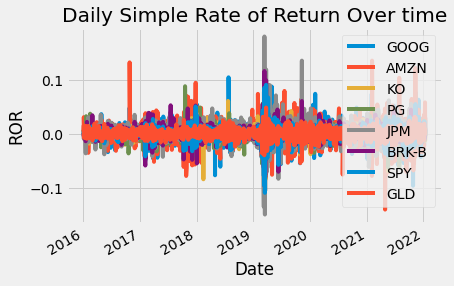

<Figure size 1152x648 with 0 Axes>

In [11]:
#Calculate and plot daily simple rate of return over time. 
df_daily_ror = df.pct_change()
df_daily_ror.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize =(16,9))
plt.show

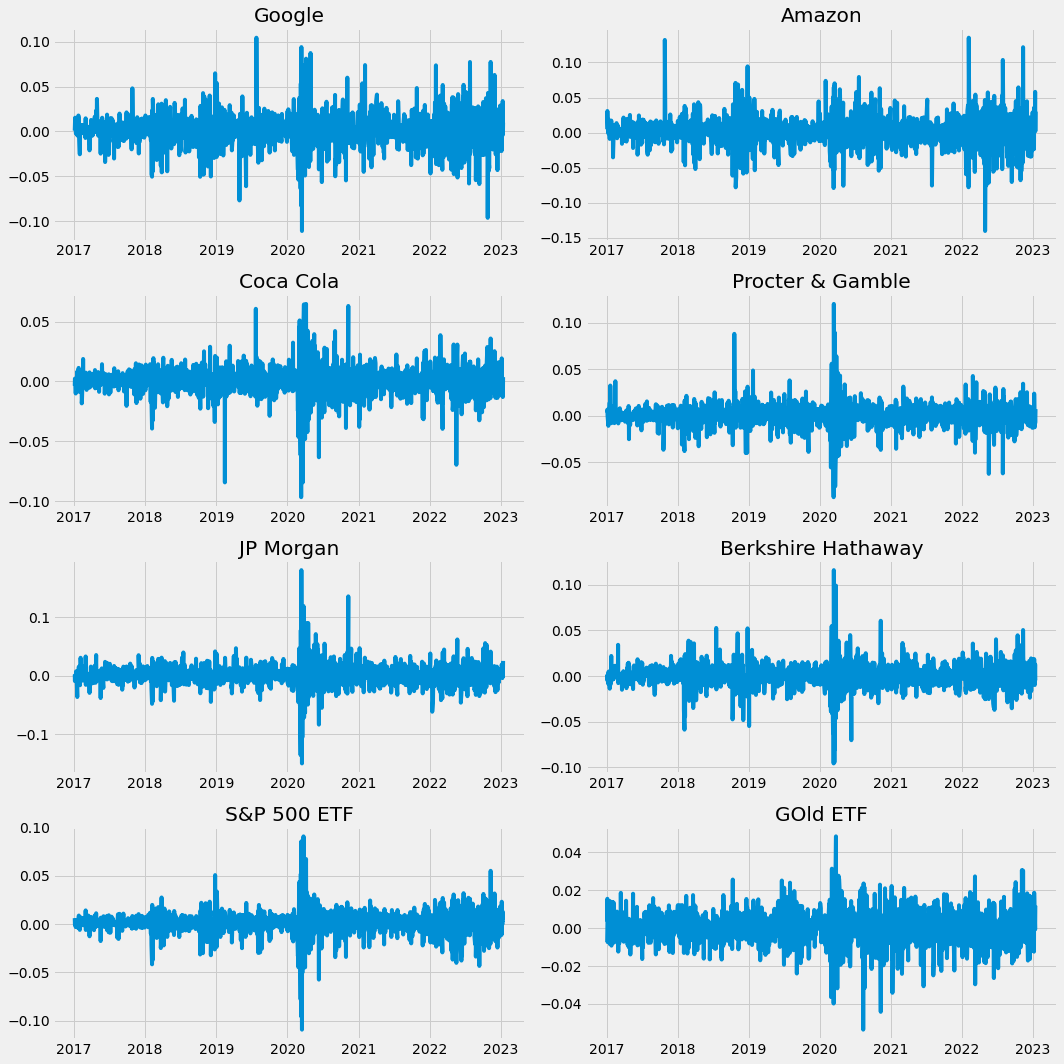

In [12]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)

ax1.plot(df['GOOG'].pct_change())
ax1.set_title("Google")
ax2.plot(df['AMZN'].pct_change())
ax2.set_title("Amazon")
ax3.plot(df['KO'].pct_change())
ax3.set_title("Coca Cola")
ax4.plot(df['PG'].pct_change())
ax4.set_title("Procter & Gamble")
ax5.plot(df['JPM'].pct_change())
ax5.set_title("JP Morgan")
ax6.plot(df['BRK-B'].pct_change())
ax6.set_title("Berkshire Hathaway")
ax7.plot(df['SPY'].pct_change())
ax7.set_title("S&P 500 ETF")
ax8.plot(df['GLD'].pct_change())
ax8.set_title("GOld ETF")
plt.tight_layout()

In [13]:
returns = df_daily_ror

In [14]:
#Calculate and plot the mean of each tech stock's daily simple rate of return 
stock_data_daily_ror= df_daily_ror.mean()
stock_data_daily_ror


GOOG     0.000736
AMZN     0.000858
KO       0.000460
PG       0.000577
JPM      0.000619
BRK-B    0.000529
SPY      0.000523
GLD      0.000355
dtype: float64

In [15]:
annualised_returns = (1+df_daily_ror.mean())**252 - 1
annualised_returns

GOOG     0.203804
AMZN     0.241224
KO       0.122987
PG       0.156431
JPM      0.168651
BRK-B    0.142633
SPY      0.140958
GLD      0.093447
dtype: float64

In [16]:
Percent_annual_return = annualised_returns*100
Percent_annual_return

GOOG     20.380360
AMZN     24.122447
KO       12.298726
PG       15.643092
JPM      16.865115
BRK-B    14.263274
SPY      14.095833
GLD       9.344661
dtype: float64

In [17]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,GOOG,AMZN,KO,PG,JPM,BRK-B,SPY,GLD
GOOG,0.085780,0.068064,0.023601,0.021862,0.041972,0.035316,0.045642,0.002999
AMZN,0.068064,0.114793,0.016632,0.017446,0.031840,0.029309,0.044422,0.004409
KO,0.023601,0.016632,0.040138,0.025989,0.031168,0.026245,0.025336,0.002609
PG,0.021862,0.017446,0.025989,0.041718,0.022999,0.021890,0.023032,0.002400
JPM,0.041972,0.031840,0.031168,0.022999,0.089837,0.051167,0.044140,-0.002776
BRK-B,0.035316,0.029309,0.026245,0.021890,0.051167,0.046859,0.035001,-0.000123
SPY,0.045642,0.044422,0.025336,0.023032,0.044140,0.035001,0.039387,0.002551
GLD,0.002999,0.004409,0.002609,0.002400,-0.002776,-0.000123,0.002551,0.018863


In [18]:
#Create and show the annualized Correlation matrix
corr_matrix_annual = returns.corr()*252
corr_matrix_annual

,GOOG,AMZN,KO,PG,JPM,BRK-B,SPY,GLD
GOOG,252.000000,172.848009,101.356614,92.093717,120.485671,140.370450,197.877016,18.788202
AMZN,172.848009,252.000000,61.745120,63.530858,79.011473,100.705068,166.481735,23.875638
KO,101.356614,61.745120,252.000000,160.048088,130.798904,152.502087,160.575960,23.897323
PG,92.093717,63.530858,160.048088,252.000000,94.669842,124.764465,143.181079,21.559123
JPM,120.485671,79.011473,130.798904,94.669842,252.000000,198.729715,186.994996,-16.995065
BRK-B,140.370450,100.705068,152.502087,124.764465,198.729715,252.000000,205.310547,-1.039490
SPY,197.877016,166.481735,160.575960,143.181079,186.994996,205.310547,252.000000,23.585254
GLD,18.788202,23.875638,23.897323,21.559123,-16.995065,-1.039490,23.585254,252.000000


In [19]:
#Yearly Return
Percent_annual_return.keys()

Index(['GOOG', 'AMZN', 'KO', 'PG', 'JPM', 'BRK-B', 'SPY', 'GLD'], dtype='object')

In [20]:
height = []
for key in Percent_annual_return.keys():
  height.append(Percent_annual_return[key])
height

[20.38036003766357,
 24.122446722010004,
 12.298725658932819,
 15.643091745951953,
 16.86511465272531,
 14.263274047422758,
 14.09583318758305,
 9.344661204773065]

In [21]:
#arrange keys on x axis based on length
x_pos = np.arange(len(Percent_annual_return.keys()))
x_pos

array([0, 1, 2, 3, 4, 5, 6, 7])

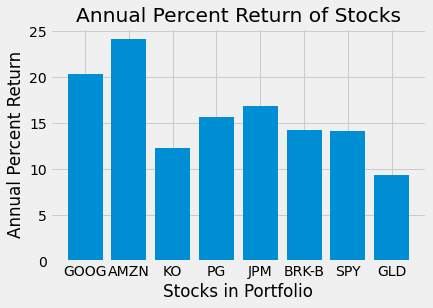

In [22]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, Percent_annual_return.keys())

# label chart
plt.xlabel("Stocks in Portfolio")
plt.ylabel("Annual Percent Return")
plt.title("Annual Percent Return of Stocks")

# show graphic
plt.show()

In [23]:
#Plot Variance 
daily_var =df_daily_ror.var()
daily_var

GOOG     0.000340
AMZN     0.000456
KO       0.000159
PG       0.000166
JPM      0.000356
BRK-B    0.000186
SPY      0.000156
GLD      0.000075
dtype: float64

In [24]:
daily_var.keys()
height = []
for key in daily_var.keys():
  height.append(daily_var[key])
#arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4, 5, 6, 7])

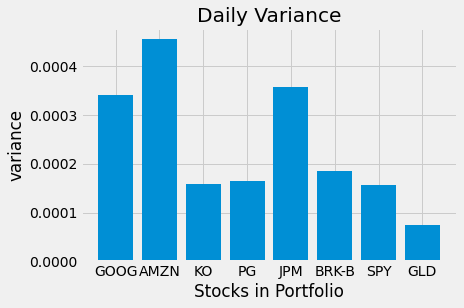

In [25]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Stocks in Portfolio")
plt.ylabel("variance")
plt.title("Daily Variance")

# show graphic
plt.show()

In [26]:
#Calculate the portfolio variance 
port_variance = np.dot(weight_s.T, np.dot(cov_matrix_annual, weight_s))
port_variance

0.02918219750544639

In [27]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.17082797635471303

In [28]:
#Calculate Annual Portfolio Return 
portfolioSimpleAnnualreturn = np.sum(returns.mean()* weight_s) * 252
portfolioSimpleAnnualreturn

0.14670841360370082

In [29]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance, 2)* 100) + '%'
percent_vols = str(round(port_volatility, 2)* 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualreturn, 2)*100) + '%'
print('Expected annual return:' + percent_ret)
print('Annual volatility/ risk: ' + percent_vols)
print('Aunnual Variance: '+ percent_var)

Expected annual return:15.0%
Annual volatility/ risk: 17.0%
Aunnual Variance: 3.0%


In [30]:
pip install PyPortfolioOPt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 875.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 27.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [31]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [32]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for max sharpe ratio #whats this.
ef = EfficientFrontier(mu, S)
weights1 = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('GOOG', 0.03226), ('AMZN', 0.10393), ('KO', 0.0), ('PG', 0.28906), ('JPM', 0.00619), ('BRK-B', 0.09806), ('SPY', 0.0), ('GLD', 0.47049)])
Expected annual return: 11.2%
Annual volatility: 12.2%
Sharpe Ratio: 0.76


(0.11243320447016464, 0.12152591622446207, 0.7606048762425102)

In [33]:
#DiscreteAllocation,
from IPython.core.display import Latex
#Get the discrete allocation of each share per stock 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices 

#----TYPE IN TOTAL AMOUNT YOU WANT TO INVEST----------------------------------------------
latest_prices = get_latest_prices(df)
weights1 = cleaned_weights
da = DiscreteAllocation(weights1, latest_prices, total_portfolio_value = 100000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'AMZN': 110, 'KO': 12, 'PG': 194, 'JPM': 7, 'BRK-B': 32, 'SPY': 1, 'GLD': 265}
Funds remaining: $263.47


/usr/local/lib/python3.8/dist-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [65]:
#Discrete Allocation Calculator
from matplotlib.artist import OrderedDict
#DiscreteAllocation (You Choose),
from IPython.core.display import Latex
#Get the discrete allocation of each share per stock 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices 

#----TYPE IN TOTAL AMOUNT YOU WANT TO INVEST----------------------------------------------
latest_prices = get_latest_prices(df)
weights2 = OrderedDict([('GOOG', 0.0340148732350991), ('AMZN', 0.421143412432286), ('KO', 0.0349131542981349 ), ('PG', 0.0382296012778875 ), ('JPM', 0.353314720021459 ), ('BRK-B', 0.0696424523428975 ), ('SPY', 0.0194268916584598), ('GLD', 0.029314894733775)])
daa = DiscreteAllocation(weights2, latest_prices, total_portfolio_value = 100000)

allocation, leftover = daa.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'GOOG': 37, 'AMZN': 429, 'KO': 57, 'PG': 25, 'JPM': 247, 'BRK-B': 22, 'SPY': 5, 'GLD': 16}
Funds remaining: $35.20


In [34]:
#Efficency Frontier
# Get annualized returns
mus = annualised_returns
# Get the covariances
cov = cov_matrix_annual

In [35]:
#- How many assests to include in each portfolio
n_assets = 8
#-- How many portfolios to generate
n_portfolios = 1000

#-- Initialize empty list to store mean-variance pairs for plotting
mean_variance_pairs = []

np.random.seed(75)
#-- Loop through and generate lots of random portfolios
for i in range(n_portfolios):
    #- Choose assets randomly without replacement
    assets = np.random.choice(list(returns.columns), n_assets, replace=False)
    #- Choose weights randomly
    weights1 = np.random.rand(n_assets)
    #- Ensure weights sum to 1
    weights1 = weights1/sum(weights1)

    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights1[i] * mus.loc[assets[i]]
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights1[i] * weights1[j] * cov.loc[assets[i], assets[j]]
            
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])

  

In [36]:
#What if we were to add this to a dataframe instead of a list
#(https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#:~:text=Efficient%20frontier%20is%20a%20graph,given%20level%20of%20expected%20return.)


In [37]:
#Plan
#1 Calculate Anunal Standard Deviation
#2 Calculate Annual Volatility 
#3 Concatonate Annual Return and Volatility into Dataframe
#4 Continued.....Append additional info to get portfolios 1-1000 in dataframe
#----------------
#Figure out how to print minimum Volatility portfolio (left most point)
#Figure out how to print Maximum Returns (right most point)
# How to get the weights of the stocks that you choose with the these things that I want printed.
# Figure out how to get the most effiecient portfolio with minimum volatility
#Figure out how to plot following info on graph (-Effiency fronteir graph - Minimum volatility - Optimal Risky Portfolio)



In [38]:
#Calculate Annual Standard Deviation/ Volatility
annualised_volatility = df_daily_ror.std()*252
annualised_volatility

GOOG     4.649371
AMZN     5.378458
KO       3.180392
PG       3.242363
JPM      4.758041
BRK-B    3.436352
SPY      3.150490
GLD      2.180240
dtype: float64

In [39]:
#Calculate Returns
returns_volatility = pd.concat([annualised_returns, annualised_volatility], axis=1)
returns_volatility.columns = ['Returns', 'Volatility']
returns_volatility

,Returns,Volatility
GOOG,0.203804,4.649371
AMZN,0.241224,5.378458
KO,0.122987,3.180392
PG,0.156431,3.242363
JPM,0.168651,4.758041
BRK-B,0.142633,3.436352
SPY,0.140958,3.150490
GLD,0.093447,2.180240


In [40]:
#- How many assests to include in each portfolio
n_assets = 8
#-- How many portfolios to generate
n_portfolios = 1000

p_ret =[]
p_vol = []
p_weights = []

In [41]:
for portfolio in range(n_portfolios):
  weights = np.random.random(n_assets)
  weights = weights/np.sum(weights)
  p_weights.append(weights)
  returns1 = np.dot(weights, annualised_returns)

  p_ret.append(returns1)
  var = (returns.cov()).mul(weights, axis=0).mul(weights, axis=1).sum().sum()
  sd = np.sqrt(var)
  ann_sd= sd*np.sqrt(252)
  p_vol.append(ann_sd)



In [42]:
combined_data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):

  combined_data[symbol+' weight'] = [w[counter] for w in p_weights]


In [43]:
portfolios = pd.DataFrame(combined_data)
portfolios

,Returns,Volatility,GOOG weight,AMZN weight,KO weight,PG weight,JPM weight,BRK-B weight,SPY weight,GLD weight
0,0.133942,0.153411,0.013117,0.000416,0.192149,0.076150,0.193857,0.219463,0.066107,0.238742
1,0.165835,0.173462,0.114694,0.205366,0.096890,0.161479,0.078483,0.116440,0.099344,0.127304
2,0.164199,0.178598,0.164951,0.133051,0.078305,0.130377,0.155665,0.086597,0.134621,0.116433
3,0.168808,0.192804,0.025950,0.202753,0.077035,0.167010,0.182607,0.151935,0.179624,0.013086
4,0.158275,0.166954,0.132894,0.140340,0.065969,0.120362,0.086307,0.085896,0.193186,0.175046
...,...,...,...,...,...,...,...,...,...,...
995,0.164028,0.169981,0.189601,0.160232,0.050629,0.138150,0.058121,0.205158,0.027784,0.170326
996,0.161942,0.169368,0.151672,0.227276,0.104603,0.082092,0.000640,0.040670,0.165482,0.227566
997,0.162158,0.174743,0.120716,0.139575,0.095799,0.167634,0.107235,0.148411,0.126518,0.094111
998,0.159488,0.199175,0.010168,0.143653,0.156313,0.001375,0.272300,0.221244,0.160503,0.034444


In [44]:
#Most efficient portfolio with minimum volatility
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Returns         0.141059
Volatility      0.135931
GOOG weight     0.013121
AMZN weight     0.094529
KO weight       0.186229
PG weight       0.268701
JPM weight      0.077740
BRK-B weight    0.038214
SPY weight      0.043014
GLD weight      0.278452
Name: 348, dtype: float64

In [45]:
# Finding the optimal portfolio
rf = 0.0221 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.159319
Volatility      0.153642
GOOG weight     0.036238
AMZN weight     0.280254
KO weight       0.057016
PG weight       0.205716
JPM weight      0.004776
BRK-B weight    0.069000
SPY weight      0.043442
GLD weight      0.303558
Name: 379, dtype: float64

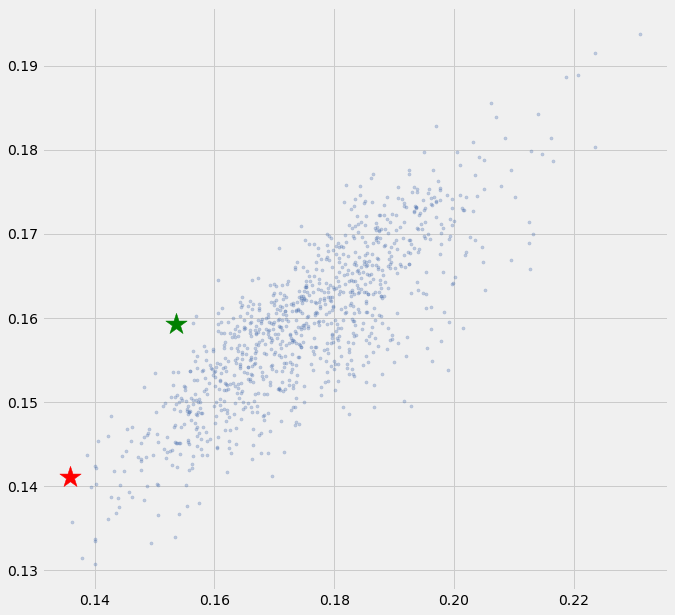

In [46]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)



In [47]:
#Plotting
#-- Plot the risk vs. return of randomly generated portfolios
#- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)
port_volatility = mean_variance_pairs[:,1]**0.5
port_return = mean_variance_pairs[:,0]
risk_free_rate=0.0221 #-- Include risk free rate here for sharpe ratio

#-- Create Plot

fig = go.Figure()
fig.add_trace(go.Scatter(x= port_volatility, 
                         y= port_return, 
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))

#- Add title/labels
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

In [48]:
port_volatility.min()

mean_variance_pairs

array([[0.15060304, 0.02968495],
       [0.1530667 , 0.02406823],
       [0.17129166, 0.03606349],
       ...,
       [0.16289546, 0.03360056],
       [0.15098237, 0.02463813],
       [0.16532239, 0.03107061]])

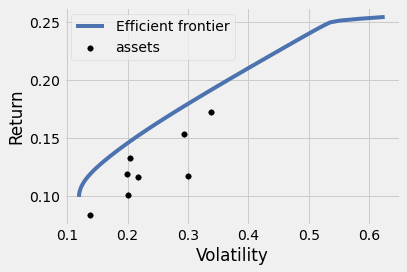

In [49]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.30)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets= True)
plt.show()